In [96]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob

In [110]:
#Instanciation de datagenrator qui permet de créer l'augmentation des images
datagenerator = ImageDataGenerator(
        rotation_range=240,         #une rotation aléatoire entre 0 et 40 degré
        width_shift_range=0.4,      #déplacement latéral aléatoire de l'image
        height_shift_range=0.4,     #déplacement vertical aléatoire de l'image
        zoom_range=0.4,             #zoome aléatoire de l'image d'une valeur entre 0 et 40%
        horizontal_flip=True,       #inversement horisontal de l'image
        vertical_flip=True,         #inversement vertical de l'image
        brightness_range=(0.5,1.5), #changement de la luminance de l'image
        fill_mode='nearest')  

In [116]:
for i, one_class in enumerate(os.listdir('C:/res')): #parcourir tout les classes dans le dossier 
    j = 0
    for batch in datagenerator.flow_from_directory(
                                               directory='C:/qq',                  #le dossier source
                                               batch_size=1,                       #taille de batch
                                               class_mode = 'binary',              #2 classes
                                               classes = [one_class],              #spécification des classes
                                               save_to_dir=f'C:/res/{one_class}',  #dossier destination                   
                                               save_format='jpeg'                  #format des images augmentés
    ):
        j += 1               
        if j > 10:        #par defaut datagenerator est une boucle infinie donc il faut le stopper 
            break

Found 4 images belonging to 1 classes.
Found 4 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


In [117]:
#ces deux affichages sert a connaitre le nombres d'images augmentées crées 
print ('le nombre de fichier dans la classe 1 :', len([name for name in os.listdir('C:/res/faked') if os.path.isfile(os.path.join('C:/res/faked', name))]))
print ('le nombre de fichier dans la classe 2 :', len([name for name in os.listdir('C:/res/original') if os.path.isfile(os.path.join('C:/res/original', name))]))

le nombre de fichier dans la classe 1 : 22
le nombre de fichier dans la classe 2 : 22


In [118]:


#creation des dossiers : train,test
os.chdir('C:/res/')
if os.path.isdir('train/faked') is False: #condition sur l'existance des dossiers
    os.makedirs('train/faked')
    os.makedirs('train/original')
    os.makedirs('test/faked')
    os.makedirs('test/original')
    

In [119]:
!pwd

C:\res


In [120]:
#organisation des images en dossiers : train,valid et test

nbr_images_faked_train=10
nbr_images_original_train=10
nbr_images_faked_test=10
nbr_images_original_test=10
for i in random.sample(glob.glob('faked/_*'),nbr_images_faked_train):           #choisir aléatoirement N images de dossier 'faked'
    shutil.move(i, 'train/faked')                                               #déplacer les images ver le dossier destination 
    
for i in random.sample(glob.glob('original/_*'),nbr_images_original_train):     #choisir aléatoirement N images de dossier 'original'
    shutil.move(i, 'train/original')                                            #déplacer les images ver le dossier destination
    
for i in random.sample(glob.glob('faked/_*'),nbr_images_faked_test):            #choisir aléatoirement N images de dossier 'faked'
    shutil.move(i, 'test/faked')                                                #déplacer les images ver le dossier destination

for i in random.sample(glob.glob('original/_*'),nbr_images_original_test):      #choisir aléatoirement N images de dossier 'original'
    shutil.move(i, 'test/original')                                             #déplacer les images ver le dossier destination

os.chdir('../../')

In [121]:
#importer train dataset
train_set=image_dataset_from_directory(      
    'C:/res/train',          #dossier source                       
    color_mode='rgb',        #mode de couleurs
    batch_size=32,           #taille de batch
    image_size=(224,224),    #redimensionement des images
    shuffle=True,            #mélanger aléatoirement les images
    seed=1,                  #necessaire si on a validation_split
    subset='validation',     #necessaire si on a validation_split
    validation_split=0.2     #devision de dataset en train et valid
)

test_set=image_dataset_from_directory(
    'C:/res/train',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

Found 20 files belonging to 2 classes.
Using 4 files for validation.
Found 20 files belonging to 2 classes.


In [122]:
#prendre un exemple du train_set
im=train_set.take(1)

In [131]:
def plotImage(images):
    
    '''
    plot image permet de visualiser 9 image de la dataset importée 

    inputs :
    images -- instance de image_dataset_from_directory
    '''    

    plt.figure(figsize = (10,10))
    for images, labels in im :
        for i in range(3):
            ax = plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")


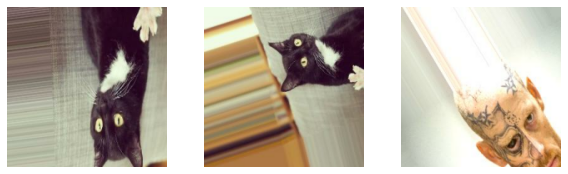

In [132]:
#visualisation des images 
plotImage(im)